In [ ]:
'''k = int(input())  # 정점 개수
n = int(input())  # 간선의 정보 개수
# [노드1, 노드2, 가중치] 리스트
lst = [list(input().split()) for _ in range(n)]

# 가중치 기준으로 정렬
lst.sort(key=lambda x:int(x[2]))'''

In [ ]:
'''
txt파일이 입력으로 주어지는 기출들이 있길래....
with open('data.txt', 'r') as file:
    # Read lines from the file
    lines = file.readlines()

# Process each line and create a list of tuples
data = [tuple(map(int, line.split())) for line in lines]

# Print the result
print(data)
'''

## **1. DFS & BFS**

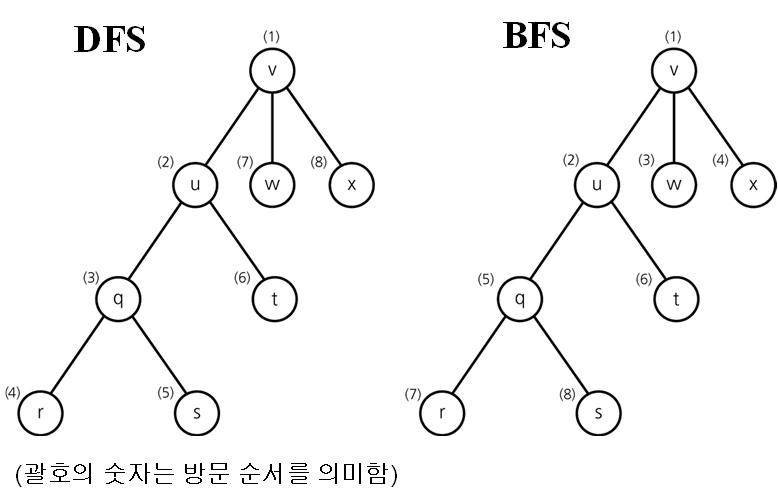

In [ ]:
mytree = {  "v" : {"u", "w", "x"},
            "u" : {"q", "t"},
            "w" : {},
            "x" : {},
            "q" : {"r", "s"},
            "t" : {},
            "r" : {},
            "s" : {}
          }

In [ ]:
N1 = {0:'q', 1:'r', 2:'s', 3:'t', 4:'u', 5:'v', 6:'w', 7:'x'}
A1 = [[0,1,1,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [1,0,0,1,0,0,0,0],
      [0,0,0,0,1,0,1,1],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0]]
G1 = (N1, A1)

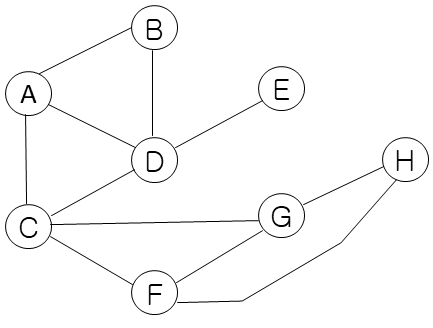

In [ ]:
mygraph = { "A" : {"B","C", "D"},
            "B" : {"A", "D"},
            "C" : {"A", "D", "F", "G"},
            "D" : {"A", "B", "C", "E"},
            "E" : {"D"},
            "F" : {"C", "G", "H"},
            "G" : {"C", "F", "H"},
            "H" : {"F", "G"}
          }

In [ ]:
N2 = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H'}
A2 = [[0,1,1,1,0,0,0,0],        # 대칭 행렬
      [1,0,0,1,0,0,0,0],
      [1,0,0,1,0,1,1,0],
      [1,1,1,0,1,0,0,0],
      [0,0,0,1,0,0,0,0],
      [0,0,1,0,0,0,1,1],
      [0,0,1,0,0,1,0,1],
      [0,0,0,0,0,1,1,0]]
G2 = (N2, A2)

#### **DFS (Depth-First Search) 알고리즘**

dfs 함수는 최대 |E|*2회로 재귀적 호출됨.(visited를 if문으로 for문에 포함시키면 정확히 edge의 양방향에서 호출됨)

dfs 함수에서 if문 이하는 |V|회만 실행됨.(최초 호출될 때마다 visited로 표시되기 때문)

총 O(|V|+|E|)만큼 실행됨

In [ ]:
# 인접리스트, 재귀함수
def DFS(G, v) :
    visited = []

    for v in G.keys() :
        if v not in visited :
            aDFS(G, v, visited)

    return visited

def aDFS(G,v, visited) :
    visited.append(v)

    for u in G[v] :
        if u not in visited :
              aDFS(G,u, visited)

In [ ]:
print("DFS:", DFS(mytree, "v"))
print("DFS:", DFS(mygraph, "A"))

DFS: ['v', 'x', 'w', 'u', 't', 'q', 'r', 's']
DFS: ['A', 'C', 'F', 'G', 'H', 'D', 'E', 'B']


In [ ]:
# 인접행렬
def DFS_tbl(G,v) :
    dic, tbl = G
    visited = []
    visited.append(v)

    for j in range(len(tbl)) :
        if tbl[v][j] == 1 and j not in visited :
            aDFS(tbl, j, visited)

    return visited


def aDFS(G,v, visited) :
    visited.append(v)
    for u in range(len(G)) :
        if G[v][u] == 1 and u not in visited :
            aDFS(G, u, visited)

def idx_to_key(visited, N) :
    keys = []
    for num in visited :
        keys.append(N[num])

    return keys

In [ ]:
idxs = DFS_tbl(G1, 5)
print(idxs, idx_to_key(idxs, N1))
idxs = DFS_tbl(G2, 0)
print(idxs, idx_to_key(idxs, N2))

[5, 4, 0, 1, 2, 3, 6, 7] ['v', 'u', 'q', 'r', 's', 't', 'w', 'x']
[0, 1, 3, 2, 5, 6, 7, 4] ['A', 'B', 'D', 'C', 'F', 'G', 'H', 'E']


#### **BFS (Breath-First Search) 알고리즘**

BFS는 while문 내에 for문이 내장됨.

while문은 정확히 |V|회 실행됨.

for문은 L=(G(u)-visited)의 크기만큼 실행되지만, while문에 대하여 모두 합산하면 |E|회 실행됨.

그러므로, 총 Θ(|V|+|E|)만큼 실행됨.

In [ ]:
# 인접리스트, 큐 라이브러리 X
def BFS(G, s) :
    queue = []
    visited = []
    visited.append(s)
    queue.append(s)

    while queue :
        u = queue.pop(0)
        for v in G[u] :
            if v not in visited :
                queue.append(v)
                visited.append(v)

    return visited

print(BFS(mytree, "v"))
print(BFS(mygraph, "A"))

['v', 'x', 'w', 'u', 't', 'q', 'r', 's']
['A', 'C', 'D', 'B', 'F', 'G', 'E', 'H']


In [ ]:
# 인접리스트, 큐 라이브러리 O FIFO
import queue

def BFS(G, s):
    my_queue  = queue.Queue()
    visited = [s]

    my_queue.put(s)     # 뒤에 삽입

    while not my_queue.empty() :
        u = my_queue.get()      # 가장 맨 앞 숫자 추출
        for v in G[u] :
            if v not in visited :
                visited.append(v)
                my_queue.put(v)

    return visited

print(BFS(mytree, "v"))
print(BFS(mygraph, "A"))

['v', 'x', 'w', 'u', 't', 'q', 'r', 's']
['A', 'C', 'D', 'B', 'F', 'G', 'E', 'H']


In [ ]:
import queue
def BFS_tbl(G, s):
    my_queue  = queue.Queue()
    dic, tbl = G
    visited = [s]
    my_queue.put(s)

    while not my_queue.empty() :
        u = my_queue.get()
        for j in range(len(tbl)) :
            if tbl[u][j] == 1 and j not in visited :
                my_queue.put(j)
                visited.append(j)

    return visited

def idx_to_key(visited, N) :
    keys = []
    for num in visited :
        keys.append(N[num])

    return keys

idxs = BFS_tbl(G1, 5)
print(idxs, idx_to_key(idxs, N1))
indexes = BFS_tbl(G2, 0)
print(idxs, idx_to_key(idxs, N2))

[5, 4, 6, 7, 0, 3, 1, 2] ['v', 'u', 'w', 'x', 'q', 't', 'r', 's']
[5, 4, 6, 7, 0, 3, 1, 2] ['F', 'E', 'G', 'H', 'A', 'D', 'B', 'C']


## **2. 최소신장트리**

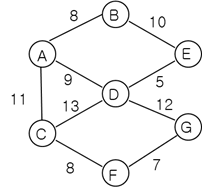

In [ ]:
mywgraph = { "A" : {"B":8,  "C":11, "D":9},
      "B" : {"A": 8, "E":10},
      "C" : {"A":11, "D":13, "F":8},
      "D" : {"A":9,  "C":13, "E":5, "G":12},
      "E" : {"B":10, "D":5},
      "F" : {"C":8,  "G":7},
      "G" : {"D":12, "F":7}
      }

#### **프림 알고리즘**

In [ ]:
def Prim(G, r) :
    conn = []
    S = [r]
    V = G.keys()
    while len(S) < len(V) :
        x, y, min_cost = find_min_edge(S,G) # x in S, y not in S
        S.append(y)
        conn.append([x, y, min_cost])

    print("방문 순서 :", S)
    return conn

def find_min_edge(S,G):
    min_cost = float("inf")
    for s in S :        # A
        for u in G[s] : # B, C, D
            if u not in S :     # V-S
                if G[s][u] < min_cost :     # G[A][B] = 8
                    x = s; y = u
                    min_cost = G[s][u]

    return x, y, min_cost

Prim(mywgraph, "A")

방문 순서 : ['A', 'B', 'D', 'E', 'C', 'F', 'G']


[['A', 'B', 8],
 ['A', 'D', 9],
 ['D', 'E', 5],
 ['A', 'C', 11],
 ['C', 'F', 8],
 ['F', 'G', 7]]

In [ ]:
N3 = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G'}
A3 = [[0, 8, 11, 9, 0, 0, 0],
 [8, 0, 0, 0, 10, 0, 0],
 [11, 0, 0, 13, 0, 8, 0],
 [9, 0, 13, 0, 5, 0, 12],
 [0, 10, 0, 5, 0, 0, 0],
 [0, 0, 8, 0, 0, 0, 7],
 [0, 0, 0, 12, 0, 7, 0]]
G3 = (N3, A3)

In [ ]:
def Prim_tbl(G, r) :
    conn = []
    S = [r]
    dic, tbl = G
    while len(S) < len(dic.keys()) :
        x, y, min_cost = find_min_edge(S,G)
        S.append(y)
        conn.append([dic[x], dic[y], min_cost])
    return conn

def find_min_edge(S,G):
    dic, tbl = G
    min_cost = float("inf")
    for i in S : # 0 / 행
        for j in range(len(tbl)) : # 열
            if j not in S :
                cost = tbl[i][j]
                if min_cost > cost and cost != 0  :
                    min_cost = cost
                    x = i; y = j

    return x, y, min_cost

Prim_tbl(G3, 0)

[['A', 'B', 8],
 ['A', 'D', 9],
 ['D', 'E', 5],
 ['A', 'C', 11],
 ['C', 'F', 8],
 ['F', 'G', 7]]

#### **크루스칼 알고리즘**

In [ ]:
mywgraph = { "A" : {"B":8,  "C":11, "D":9},
      "B" : {"A": 8, "E":10},
      "C" : {"A":11, "D":13, "F":8},
      "D" : {"A":9,  "C":13, "E":5, "G":12},
      "E" : {"B":10, "D":5},
      "F" : {"C":8,  "G":7},
      "G" : {"D":12, "F":7}
      }

In [ ]:
S = [set(x) for x in mywgraph.keys()]
S

[{'A'}, {'B'}, {'C'}, {'D'}, {'E'}, {'F'}, {'G'}]

In [ ]:
# 인접리스트
def Kruskal(G):
    T = []
    S = [set(x) for x in G.keys()]
    print("S=", S)
    E = sort_edges(G)

    while len(T) < len(G) -1 :
        edges, cost = E.popitem()
        u, v = list(edges)
        for s in S :
            if (u in s and v not in s) :
                S.remove(s)
                for t in S :
                    if v in t :
                        S.remove(t)
                        S.append(s.union(t))
                        print("S=", S)
                        T.append((frozenset([u,v]),cost))
                        break
    return T

def sort_edges(G) :
    E = {}
    for k1,v1 in G.items():       # A {'B': 8, 'C': 11, 'D': 9}
        for k2,v2 in v1.items():    # B 8, C 11, D 9
            E[frozenset([k1,k2])] = v2    # frozenset({'B', 'A'}): 8, 노드 k1, k2의 가중치v2 | frozenset -> key로 사용할 수 있음
    E = {k: v for k, v in sorted(E.items(), key=lambda item: item[1], reverse=True)} # E.items() : (frozenset({'B', 'A'}), 8) -> E : {frozenset({'B', 'A'}): 8, ...}

    return E


Kruskal(mywgraph)

S= [{'A'}, {'B'}, {'C'}, {'D'}, {'E'}, {'F'}, {'G'}]
S= [{'A'}, {'B'}, {'C'}, {'F'}, {'G'}, {'D', 'E'}]
S= [{'A'}, {'B'}, {'C'}, {'D', 'E'}, {'F', 'G'}]
S= [{'A'}, {'B'}, {'D', 'E'}, {'C', 'F', 'G'}]
S= [{'D', 'E'}, {'C', 'F', 'G'}, {'A', 'B'}]
S= [{'C', 'F', 'G'}, {'A', 'D', 'E', 'B'}]
S= [{'F', 'E', 'B', 'C', 'D', 'A', 'G'}]


[(frozenset({'D', 'E'}), 5),
 (frozenset({'F', 'G'}), 7),
 (frozenset({'C', 'F'}), 8),
 (frozenset({'A', 'B'}), 8),
 (frozenset({'A', 'D'}), 9),
 (frozenset({'A', 'C'}), 11)]

In [ ]:
x = {2, 4, 3, 0, 1}
a = sorted(x, reverse=True) # 내림차순
a

[4, 3, 2, 1, 0]

In [ ]:
students = [
    ('john', 'A', 15),
    ('jane', 'B', 12),
    ('dave', 'B', 10),
]
sorted(students, key=lambda student: student[2], reverse=True)   # sort by age
[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]

## **3. 위상정렬**

In [ ]:
# Graph 구조 저장하기
V = {0:"냄비에 물붓기", 1:"점화", 2:"라면 넣기",
     3:"계란 풀어넣기", 4:"라면봉지 뜯기", 5:"스프 넣기"}
E = {0:{1}, 1:{2,3,5}, 2:{3}, 3:{}, 4:{2,5}, 5:{3}}  # 진출간선
G = (E,V)

In [ ]:
# BFS
import copy
def topological_sort1(W, V):
    E = copy.deepcopy(W)
    visited = []
    recipe = []

    for i in range(len(E.keys())) :
        u = find_zero_node(E).pop() # 맨 앞 정점 u
        visited.append(u)
        recipe.append(V[u])
        E.pop(u)

    return visited, recipe


    return visited

def find_zero_node(W) :
    keys = set(W.keys())
    valid = set().union(*W.values()) # 진입간선잉 있는 노드들
    zero_set = keys.difference(valid)   # 진입간선이 없는 노드들 (차집합)
    return zero_set

topological_sort1(E,V)

([0, 1, 4, 2, 5, 3], ['냄비에 물붓기', '점화', '라면봉지 뜯기', '라면 넣기', '스프 넣기', '계란 풀어넣기'])

In [ ]:
# DFS
def topological_sort2(G) :
    E, V = G
    visited = []  # 방문표시 / visited = {i:False for i in G.keys()} 이렇게 표현해서 문제를 풀어볼 수도 있겠당
    R = []  # 위상정렬 역순
    recipe = []
    for v in E.keys() :
        if v not in visited :
            dfs_ts(E, v, visited, R)
    for r in R :
        recipe.insert(0,V[r])
    return R, recipe

def dfs_ts(E, v, visited, R) :
    visited.append(v)
    for u in E[v] :
        if u not in visited :
            dfs_ts(E, u, visited, R)
    R.insert(0,v)

topological_sort2(G)

([4, 0, 1, 5, 2, 3], ['계란 풀어넣기', '라면 넣기', '스프 넣기', '점화', '냄비에 물붓기', '라면봉지 뜯기'])

## 4. **최단경로**

#### **다익스트라(Dijkstra) 알고리즘**

In [2]:
V = {"A", "B", "C", "D", "E", "F", "G", "H"}
E = { "A" : {"B":8, "C":11, "D":9},
      "B" : {"E":10},
      "C" : {"F":8, "G":8},
      "D" : {"B":6, "C":3, "E":1},
      "E" : {"H":2},
      "F" : {"G":7},
      "G" : {"D":12, "H":5},
      "H" : {"F":4}
      }

In [5]:
def Dijkstra(V, E, r):
    S = set(r)
    d = {}
    for v in E.keys() :
        d[v] = float('inf')
    d[r] = 0
    print(d)

    while len(S) < len(V) :
        u = extract_min(V, S, E, d)
        S = S.union(u) # 방문처리
        for v, w in E[u].items() :
            if v not in S and d[v] > d[u] + w :
                d[v] = d[u] + w

    return d

def extract_min(V, S, E, d):
    min_cost = float("inf")
    for s in S : # A
        for u in E[s] : # B, C, D
            if u not in S : # V-S
                if E[s][u] < min_cost :
                    min_cost = E[s][u]
                    d[u] = min_cost
                    min_node = u

    return min_node

print("Dijkstra's Algorithm")
Dijkstra(V, E, "A")

Dijkstra's Algorithm
{'A': 0, 'B': inf, 'C': inf, 'D': inf, 'E': inf, 'F': inf, 'G': inf, 'H': inf}


{'A': 0, 'B': 8, 'C': 3, 'D': 9, 'E': 1, 'F': 4, 'G': 7, 'H': 2}

#### **벨만포드 알고리즘**

In [ ]:
V = {"A", "B", "C", "D", "E", "F", "G", "H"}
E = { "A" : {"B":8, "C":11, "D":9},
      "B" : {"E":10},
      "C" : {"F":8, "G":8},
      "D" : {"B":-15, "C":3, "E":1},
      "E" : {"H":2},
      "F" : {"G":-7},
      "G" : {"D":12, "H":5},
      "H" : {"F":4}
      }

In [ ]:
def BellmanFord(V, E, r):
  node = []
  d = {}
  for v in E.keys() :
    d[v] = float('inf')
  d[r] = 0
  print(d)

  for k1,v1 in E.items():
    for k2,v2 in v1.items():
      node.append([k1,k2,v2]) # [A,B,8]

  for i in range(len(V)-1) :
    for n in node :
        start, end, w = n
        if d[end] > d[start] + w :
            d[end] = d[start] + w
  return d

print("Bellman-Ford Algorithm")
BellmanFord(V, E, "A")

Bellman-Ford Algorithm
{'A': 0, 'B': inf, 'C': inf, 'D': inf, 'E': inf, 'F': inf, 'G': inf, 'H': inf}


{'A': 0, 'B': -6, 'C': 11, 'D': 9, 'E': 4, 'F': 10, 'G': 3, 'H': 6}

#### **플로이드-워샬(Floyd-Warshall) 알고리즘**

In [ ]:
V = {"A", "B", "C", "D", "E", "F", "G", "H"}
E = { "A" : {"B":8, "C":11, "D":9},
      "B" : {"E":10},
      "C" : {"F":8, "G":8},
      "D" : {"B":-15, "C":3, "E":1},
      "E" : {"H":2},
      "F" : {"G":-7},
      "G" : {"D":12, "H":5},
      "H" : {"F":4}
      }

In [ ]:
def FloydWarshall(D):	# Floyd의 최단경로탐색 함수.
    n = len(D)       		# 정점의 개수
    adj_matrix = make_arr(D)

    for k in range(n) : # 중간노드 k라고 생각하면 됨
        for i in range(n) :
            for j in range(n) :
                adj_matrix[i][j] = min(adj_matrix[i][j], adj_matrix[i][k] + adj_matrix[k][j])
        res_vis(adj_matrix)

def res_vis(adj_matrix) :
    n = len(adj_matrix)
    print("="*30)
    for i in range(n) :
        for j in range(n) :
            if adj_matrix[i][j] == float('inf') :
                print("INF", end="\t")
            else :
                print(adj_matrix[i][j], end="\t")
        print()

def make_arr(D) : # enumerate은 맨날 헷갈리니까 쓰지 말장
    n = len(D)
    adj_matrix = [[0 if i == j else float('inf') for j in range(n)] for i in range(n)]

    dic = {}
    for i in range(len(E)) : # {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7}
        k = list(E.keys())
        dic[k[i]] = i

    node = []
    for k1,v1 in E.items():
        for k2,v2 in v1.items():
            node.append([k1,k2,v2]) # [A,B,8]

    for n in node :
        v, u, w = n
        i = dic[v]; j = dic[u]
        adj_matrix[i][j] = w

    return adj_matrix

print("Floyd-Warshall Algorithm")
FloydWarshall(E)

Floyd-Warshall Algorithm
0	8	11	9	INF	INF	INF	INF	
INF	0	INF	INF	10	INF	INF	INF	
INF	INF	0	INF	INF	8	8	INF	
INF	-15	3	0	1	INF	INF	INF	
INF	INF	INF	INF	0	INF	INF	2	
INF	INF	INF	INF	INF	0	-7	INF	
INF	INF	INF	12	INF	INF	0	5	
INF	INF	INF	INF	INF	4	INF	0	
0	8	11	9	18	INF	INF	INF	
INF	0	INF	INF	10	INF	INF	INF	
INF	INF	0	INF	INF	8	8	INF	
INF	-15	3	0	-5	INF	INF	INF	
INF	INF	INF	INF	0	INF	INF	2	
INF	INF	INF	INF	INF	0	-7	INF	
INF	INF	INF	12	INF	INF	0	5	
INF	INF	INF	INF	INF	4	INF	0	
0	8	11	9	18	19	19	INF	
INF	0	INF	INF	10	INF	INF	INF	
INF	INF	0	INF	INF	8	8	INF	
INF	-15	3	0	-5	11	11	INF	
INF	INF	INF	INF	0	INF	INF	2	
INF	INF	INF	INF	INF	0	-7	INF	
INF	INF	INF	12	INF	INF	0	5	
INF	INF	INF	INF	INF	4	INF	0	
0	-6	11	9	4	19	19	INF	
INF	0	INF	INF	10	INF	INF	INF	
INF	INF	0	INF	INF	8	8	INF	
INF	-15	3	0	-5	11	11	INF	
INF	INF	INF	INF	0	INF	INF	2	
INF	INF	INF	INF	INF	0	-7	INF	
INF	-3	15	12	7	23	0	5	
INF	INF	INF	INF	INF	4	INF	0	
0	-6	11	9	4	19	19	6	
INF	0	INF	INF	10	INF	INF	12	
INF	INF	0	INF	INF	8	8	INF	
INF	-15

In [ ]:
'''
# 입력받아서 수행하는 경우

INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드의 개수 및 간선의 개수를 입력받기
n = int(input())
m = int(input())
# 2차원 리스트(그래프 표현)를 만들고, 모든 값을 무한으로 초기화
graph = [[INF] * (n + 1) for _ in range(n + 1)]

# 자기 자신에서 자기 자신으로 가는 비용은 0으로 초기화
for a in range(1, n + 1):
    for b in range(1, n + 1):
        if a == b:
            graph[a][b] = 0

# 각 간선에 대한 정보를 입력 받아, 그 값으로 초기화
for _ in range(m):
    # A에서 B로 가는 비용은 C라고 설정
    a, b, c = map(int, input().split())
    graph[a][b] = c

# 점화식에 따라 플로이드 워셜 알고리즘을 수행
for k in range(1, n + 1):
    for a in range(1, n + 1):
        for b in range(1, n + 1):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

# 수행된 결과를 출력
for a in range(1, n + 1):
    for b in range(1, n + 1):
        # 도달할 수 없는 경우, 무한(INFINITY)이라고 출력
        if graph[a][b] == 1e9:
            print("INFINITY", end=" ")
        # 도달할 수 있는 경우 거리를 출력
        else:
            print(graph[a][b], end=" ")
    print()
'''

#### **DAG에서의 최단경로 구하기**

In [ ]:
# 강의교재 그림 에시
G = {'a':{'b':6, 'd':1},
     'b':{'d':7, 'f':5, 'c':3},
     'c':{'e':4},
     'd':{'e':-2, 'f':1},
     'e':{'f':-3},
     'f':{}}

In [ ]:
def dag(G,r) :
    d = {}
    for v in G.keys() :
        d[v] = float('inf')
    d[r] = 0
    print(d)

    ts = topological_sort2(G) # ['a', 'b', 'c', 'd', 'e', 'f']
    for u in ts :
        for v in G[u] :
            if d[u] + G[u][v] < d[v]:
                d[v] = d[u] + G[u][v]
    return d

dag(G,"b")

{'a': inf, 'b': 0, 'c': inf, 'd': inf, 'e': inf, 'f': inf}


{'a': inf, 'b': 0, 'c': 3, 'd': 7, 'e': 5, 'f': 2}